# ***`1`***

In [ ]:
import numpy as np

def hebbian(x, y, w, lr=0.1):
    return w + lr * np.outer(x, y)

def perceptron(x, y, w, lr=0.1):
    return w + lr * x * y if np.dot(w, x) * y <= 0 else w

def delta(x, y, w, lr=0.1):
    return w + lr * (y - np.dot(w, x)) * x

def correlation(x, y, w, lr=0.1):
    return w + lr * np.outer(x, y)

def outstar(x, y, w, lr=0.1):
    return w + lr * (y - np.dot(w, x))

# Example usage
x = np.array([1, -1, 0, 0.5])
y = 1
w = np.array([0.2, -0.1, 0.0, 0.1])

w_hebbian = hebbian(x, y, w)
w_perceptron = perceptron(x, y, w)
w_delta = delta(x, y, w)
w_correlation = correlation(x, y, w)
w_outstar = outstar(x, [y], w)

print("Hebbian:", w_hebbian)
print("Perceptron:", w_perceptron)
print("Delta:", w_delta)
print("Correlation:", w_correlation)
print("OutStar:", w_outstar)


Hebbian: [[ 0.3   0.    0.1   0.2 ]
 [ 0.1  -0.2  -0.1   0.  ]
 [ 0.2  -0.1   0.    0.1 ]
 [ 0.25 -0.05  0.05  0.15]]
Perceptron: [ 0.2 -0.1  0.   0.1]
Delta: [ 0.265  -0.165   0.      0.1325]
Correlation: [[ 0.3   0.    0.1   0.2 ]
 [ 0.1  -0.2  -0.1   0.  ]
 [ 0.2  -0.1   0.    0.1 ]
 [ 0.25 -0.05  0.05  0.15]]
OutStar: [ 0.265 -0.035  0.065  0.165]


# ***`2`***

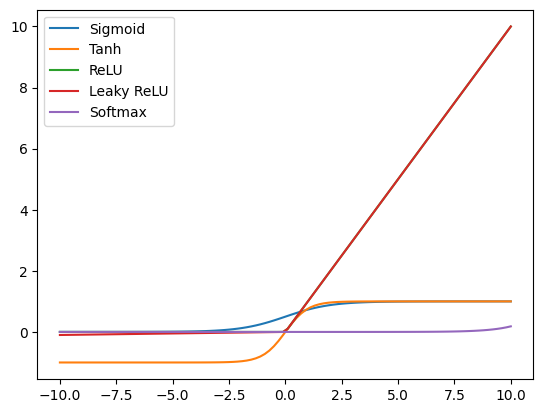

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.plot(x, np.where(x > 0, x, x * 0.01), label='Leaky ReLU')
plt.plot(x, np.exp(x) / np.sum(np.exp(x)), label='Softmax')  # Simplified for 1D
plt.legend()
plt.show()


## ***`3`***

In [ ]:
def perceptron(inputs, weights, bias):
    activation = sum(i * w for i, w in zip(inputs, weights)) + bias
    return 1 if activation >= 0 else 0

inputs = [1, 1, 1]
weights = [0.2, 0.4, 0.2]
bias = -0.5

expected_output = 1

output = perceptron(inputs, weights, bias)

accuracy = 100 if output == expected_output else 0

print("Output:", output)
print("Accuracy:", accuracy, "%")


Output: 1
Accuracy: 100 %


### ***`4`***

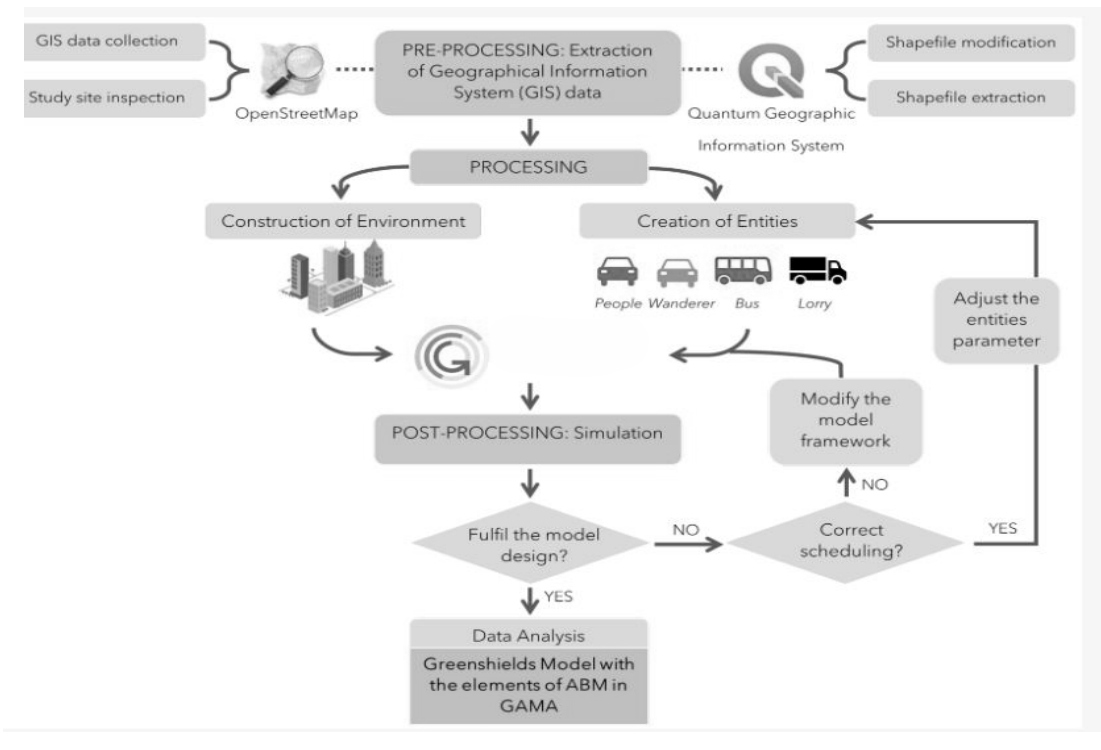

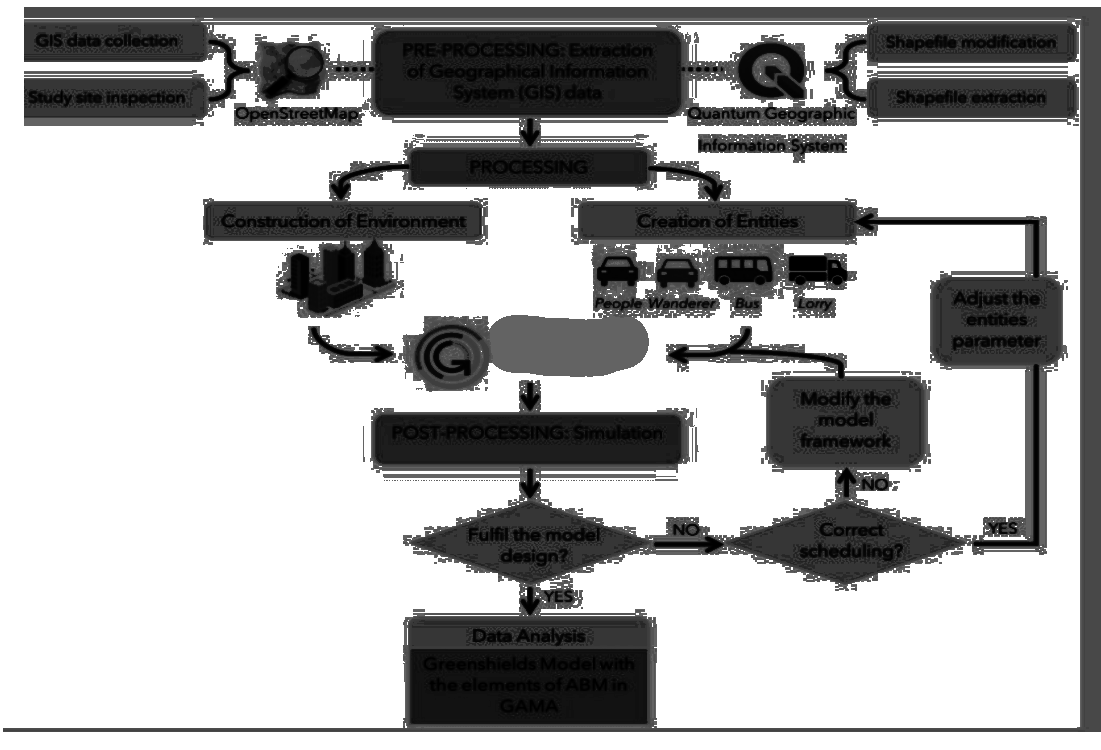

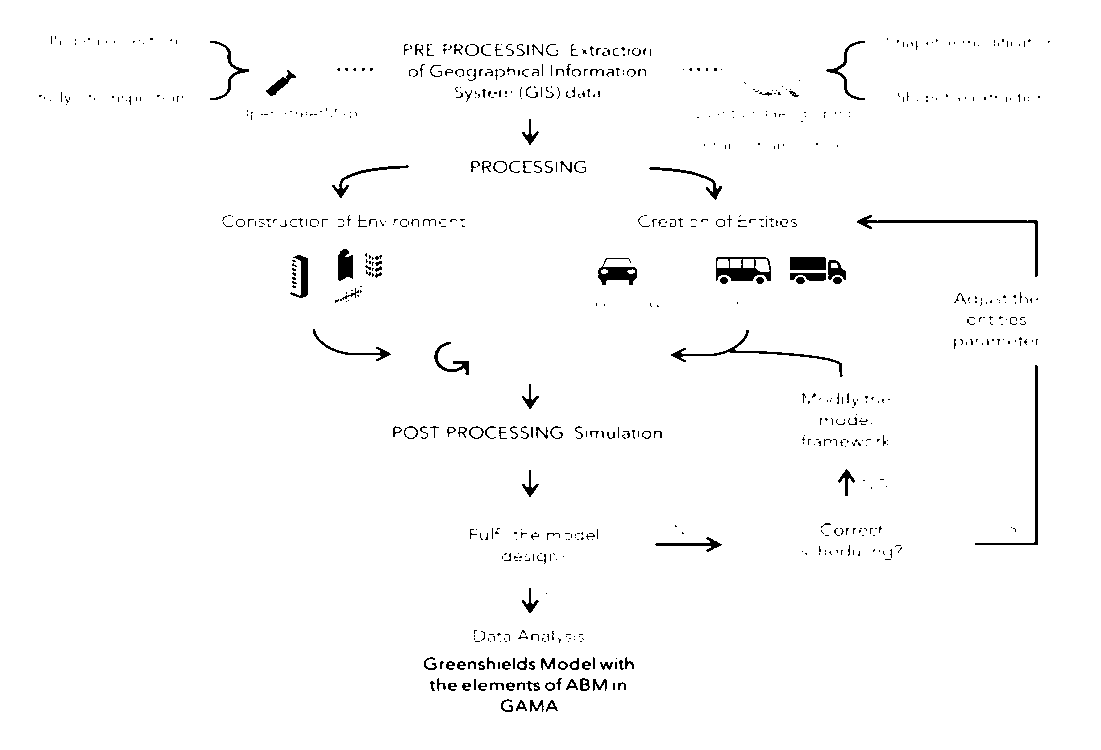

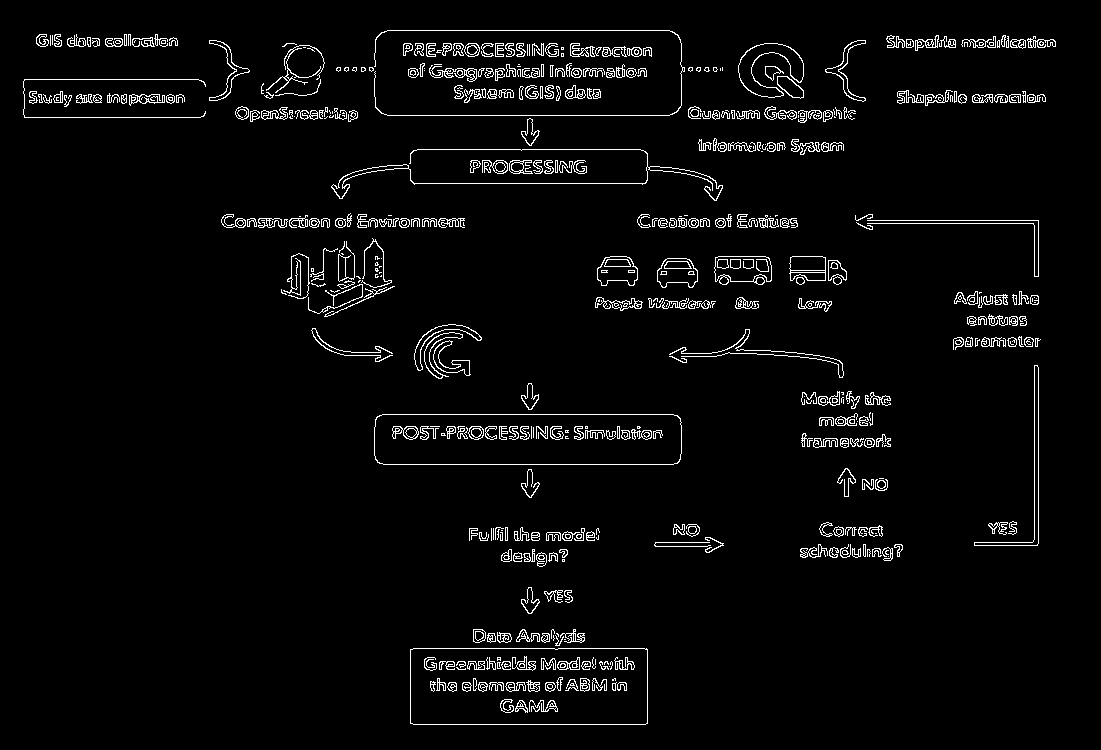

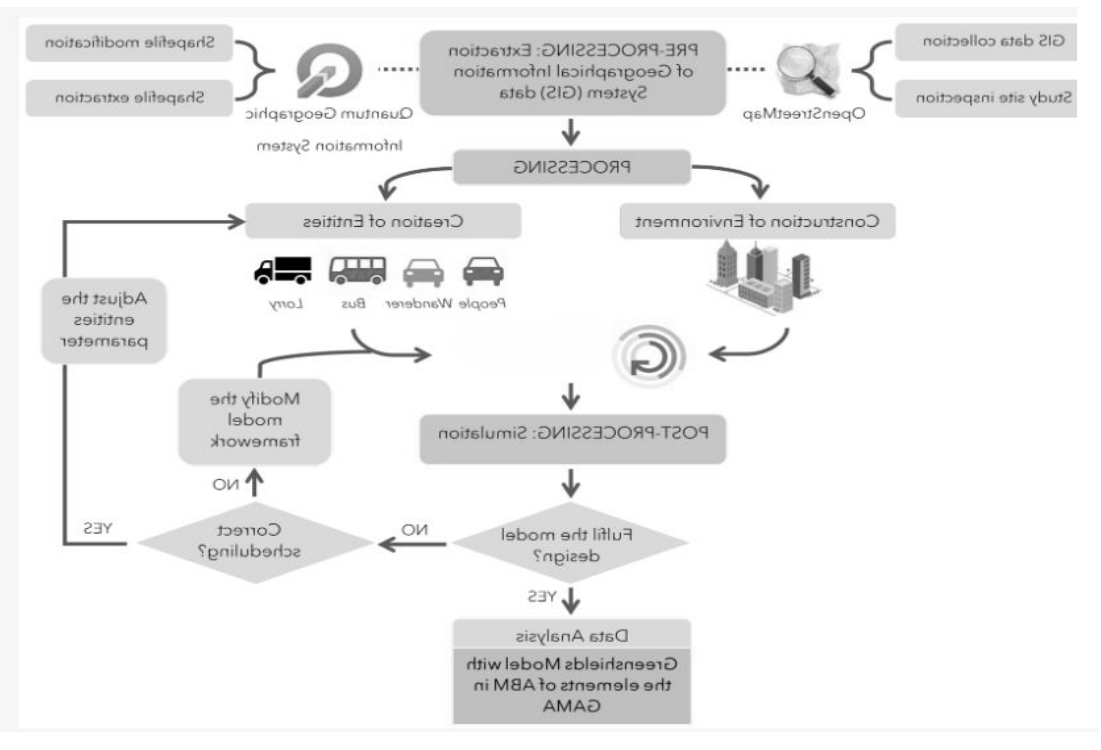

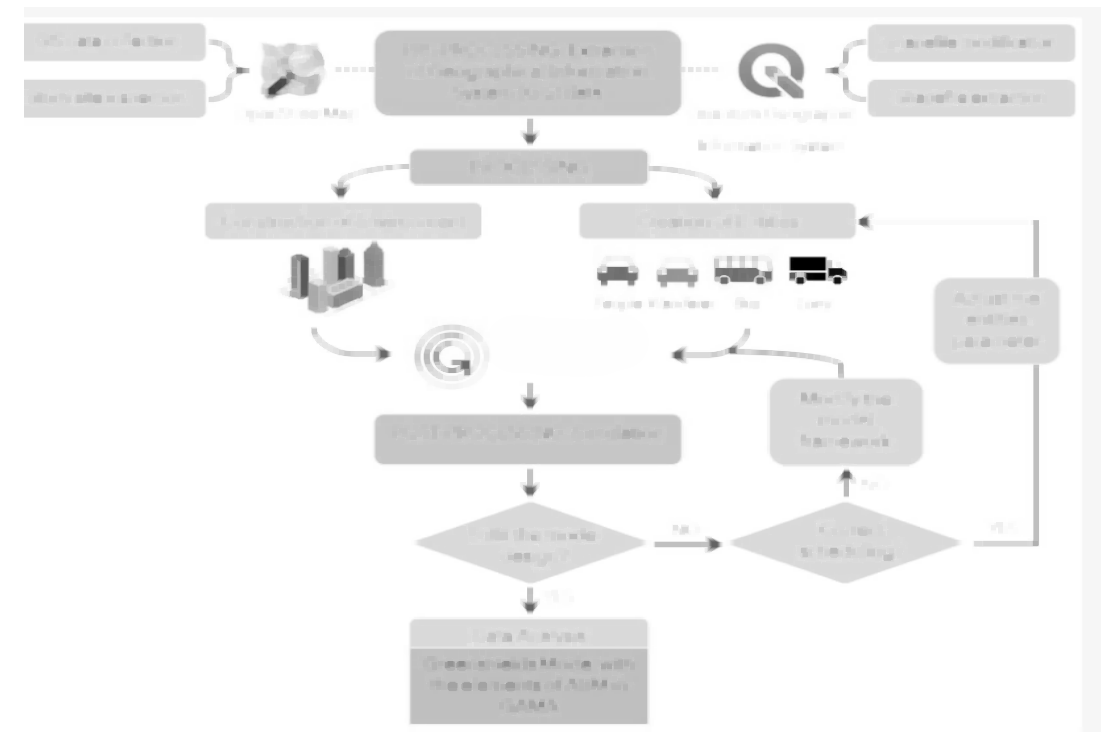

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized = cv2.equalizeHist(img)
    _, thresholded = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(img, 100, 200)
    flipped = cv2.flip(img, 1)
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    cv2_imshow(img)
    cv2_imshow(equalized)
    cv2_imshow(thresholded)
    cv2_imshow(edges)
    cv2_imshow(flipped)
    cv2_imshow( morphed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

process_image('/content/Screenshot 2024-06-18 130509.png')



### ***`5`***



In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    img = tf.image.resize(tf.image.decode_image(tf.io.read_file(image_path), channels=3), [512, 512])
    return img[tf.newaxis, ...] / 255.0

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2 ')

content_image = load_and_process_image('/content/abcd.png')
style_image = load_and_process_image('/content/abcd.png')

stylized_image = model(content_image, style_image)[0]

plt.figure(figsize=(12, 4))
for i, img in enumerate([content_image, style_image, stylized_image], 1):
    plt.subplot(1, 3, i)
    plt.imshow(img[0])
    plt.axis('off')
plt.show()


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/abcd.png; No such file or directory [Op:ReadFile]

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    """Load and preprocess the image."""
    # Read the image from file
    img = tf.io.read_file(image_path)
    # Decode the image
    img = tf.image.decode_image(img, channels=3)
    # Resize the image
    img = tf.image.resize(img, [512, 512])
    # Normalize the image
    img = img / 255.0
    # Add a batch dimension
    return img[tf.newaxis, ...]

def plot_images(content_image, style_image, stylized_image):
    """Plot content, style, and stylized images."""
    plt.figure(figsize=(12, 4))
    titles = ['Content Image', 'Style Image', 'Stylized Image']
    images = [content_image, style_image, stylized_image]

    for i, img in enumerate(images):
        plt.subplot(1, 3, i + 1)
        plt.title(titles[i])
        plt.imshow(img[0])
        plt.axis('off')

    plt.show()

# Load the model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Paths to your content and style images
content_image_path = '/content/abcd.png'
style_image_path = '/content/efgh.png'  # Use a different image for style

# Load and process the images
content_image = load_and_process_image(content_image_path)
style_image = load_and_process_image(style_image_path)

# Apply the style transfer
stylized_image = model(content_image, style_image)[0]

# Plot the images
plot_images(content_image, style_image, stylized_image)


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/abcd.png; No such file or directory [Op:ReadFile]

### ***`6`***

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

predictions = model.predict(x_test)


predicted_labels = np.argmax(predictions, axis=1)

num_samples_to_display = 5
for i in range(num_samples_to_display):
    print(f"Sample {i+1}: True Label: {y_test[i][0]}, Predicted Label: {predicted_labels[i]}")


170498071/170498071 [==============================] - 19s 0us/step
Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8843 - accuracy: 0.3245 - val_loss: 1.7626 - val_accuracy: 0.3708
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6994 - accuracy: 0.3947 - val_loss: 1.6786 - val_accuracy: 0.3986
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6306 - accuracy: 0.4199 - val_loss: 1.5884 - val_accuracy: 0.4385
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5913 - accuracy: 0.4328 - val_loss: 1.5871 - val_accuracy: 0.4381
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5649 - accuracy: 0.4421 - val_loss: 1.5494 - val_accuracy: 0.4464
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5377 - accuracy: 0.4502 - val_loss: 1.5650 - val_accuracy: 0.4449
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step 

### ***`7`***

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

### ***`8`***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Load and prepare data
data = pd.read_csv('/content/sonar.csv')
X = StandardScaler().fit_transform(data.drop('Target', axis=1))
y = LabelEncoder().fit_transform(data['Target'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_dim=60),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate model
model.fit(X_train, y_train, epochs=50, validation_split=0.1)
print("Test Accuracy:", model.evaluate(X_test, y_test)[1])


KeyError: "['Target'] not found in axis"

### ***`9`***

11490434/11490434 [==============================] - 0s 0us/step


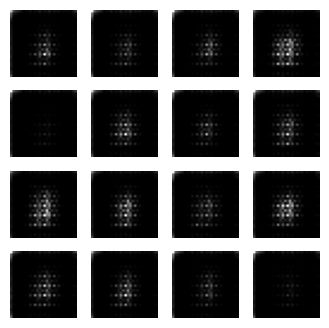

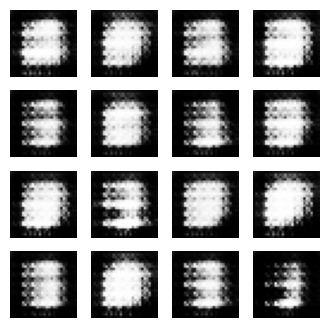

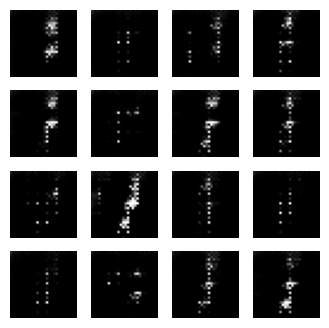

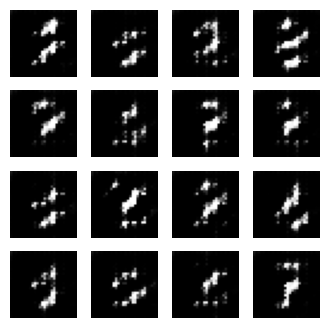

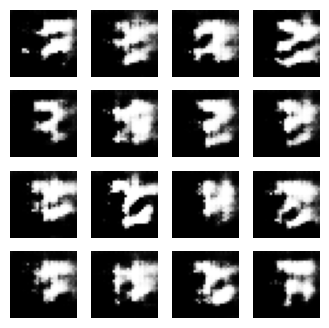

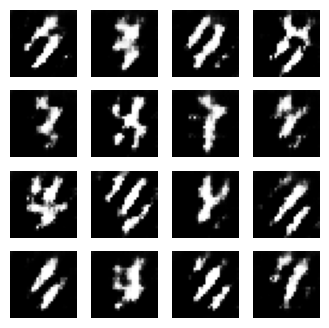

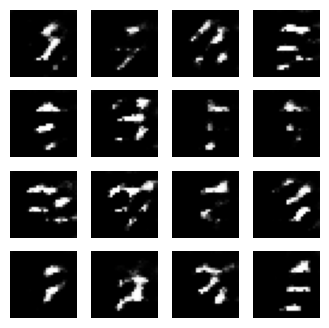

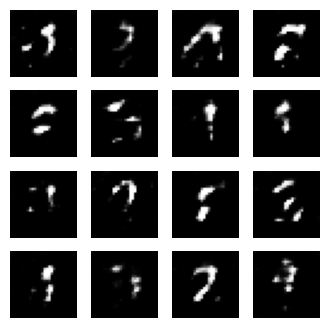

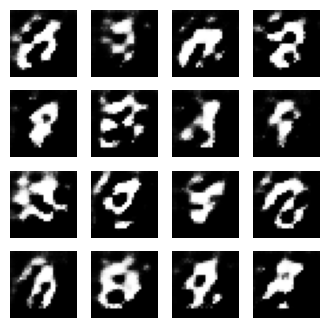

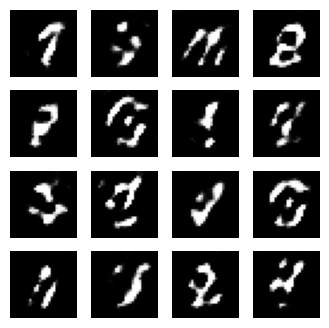

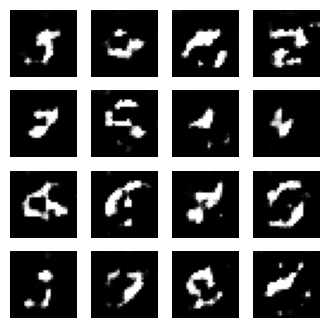

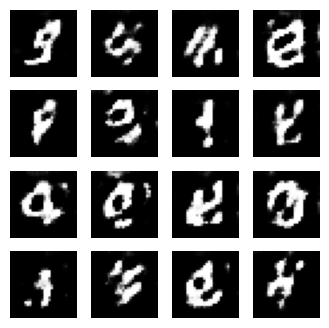

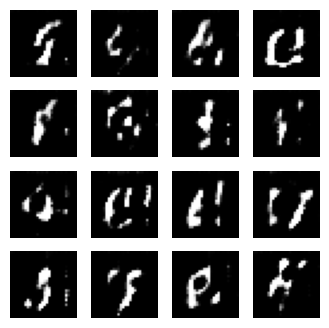

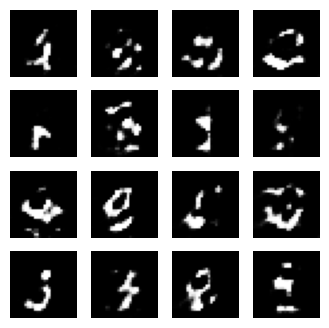

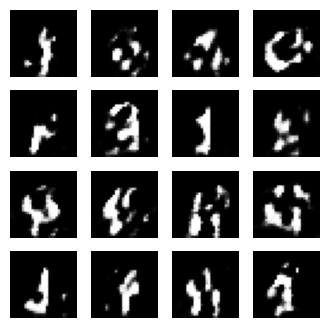

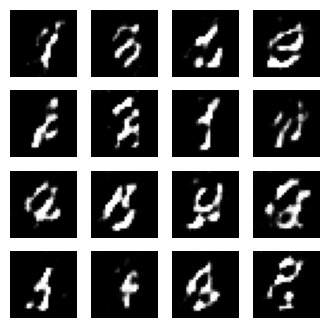

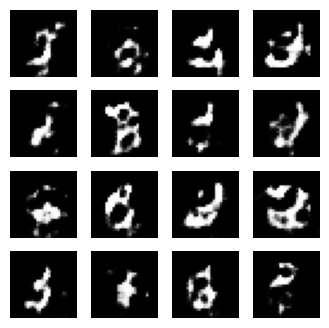

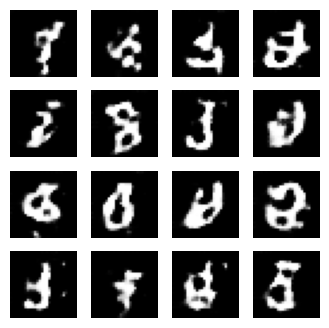

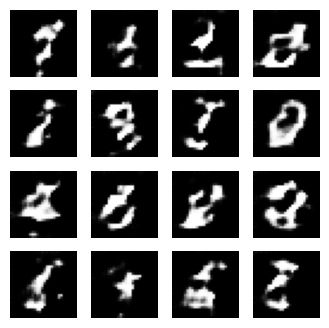

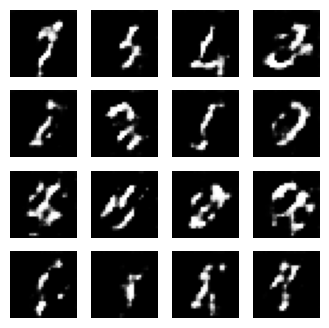

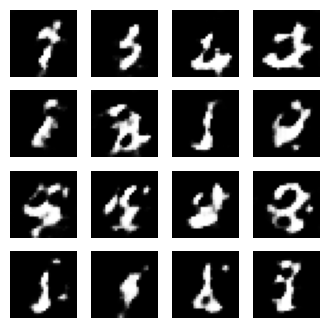

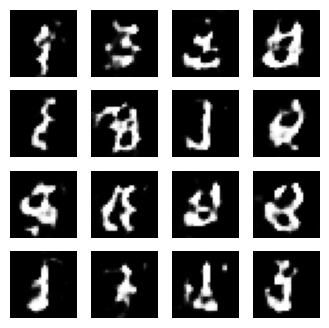

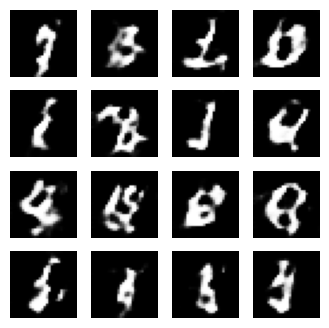

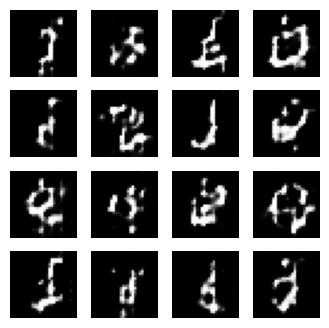

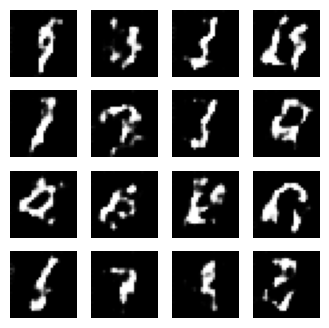

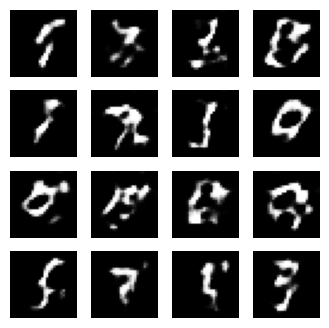

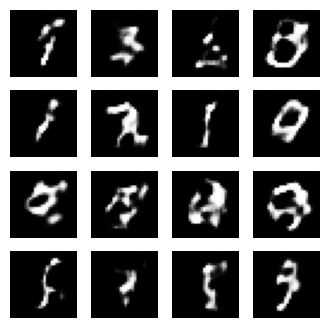

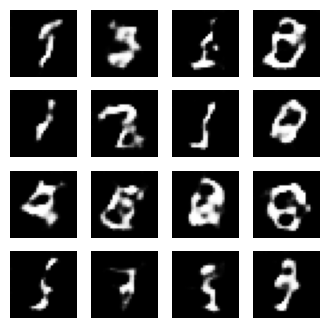

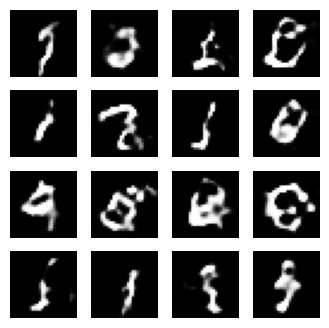

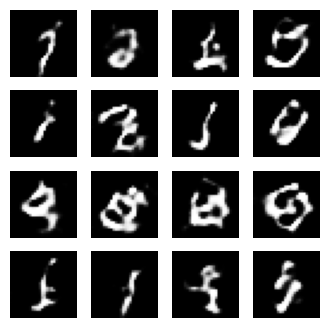

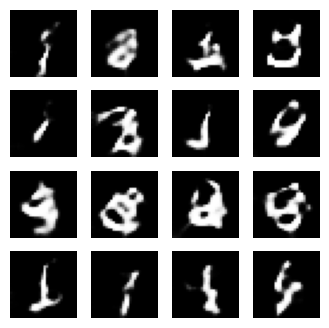

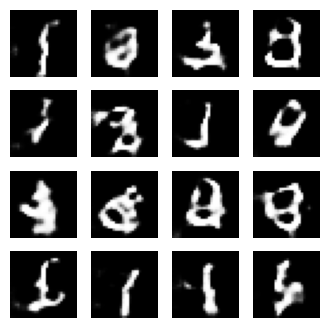

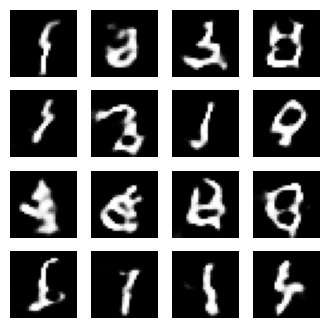

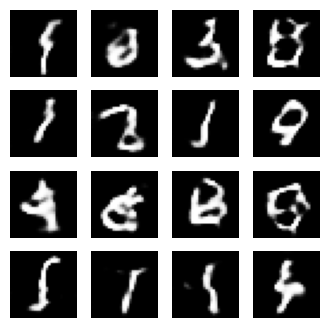

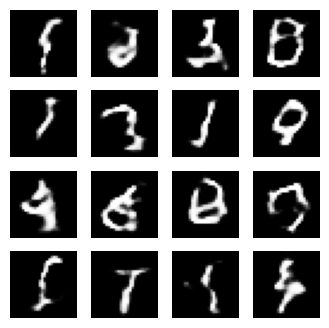

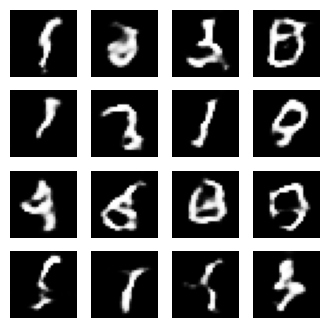

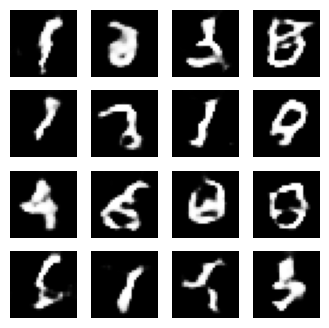

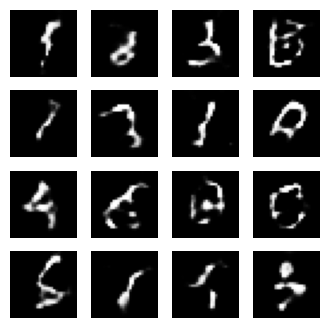

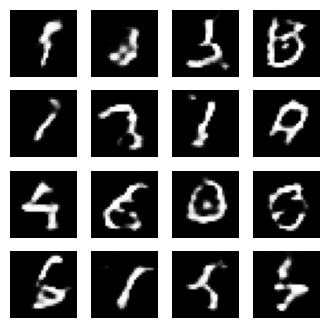

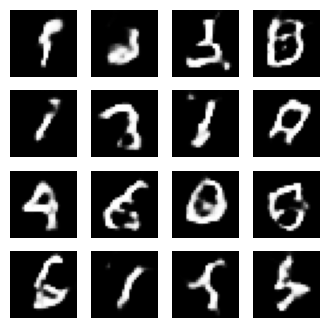

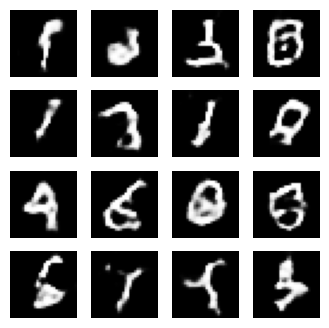

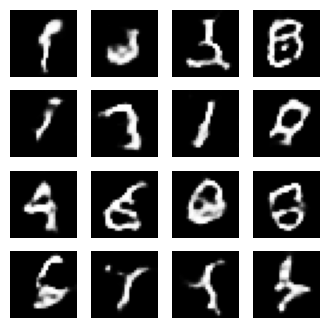

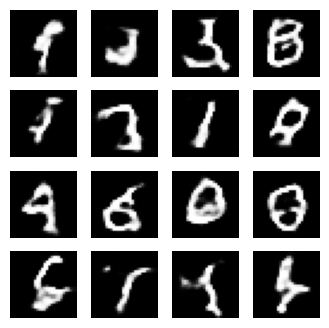

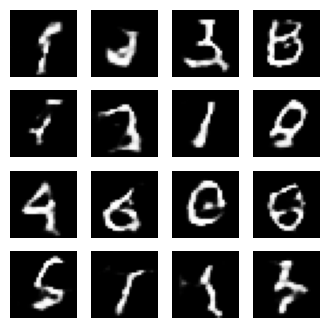

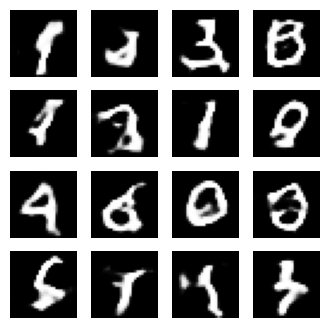

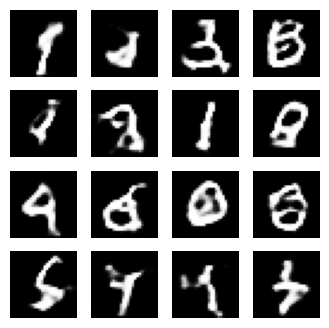

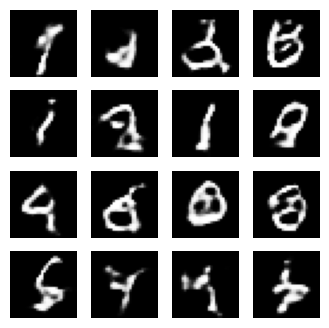

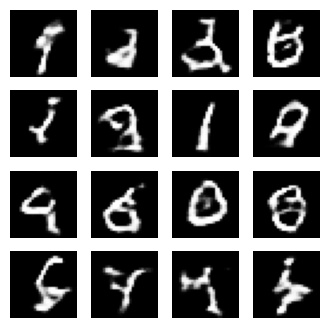

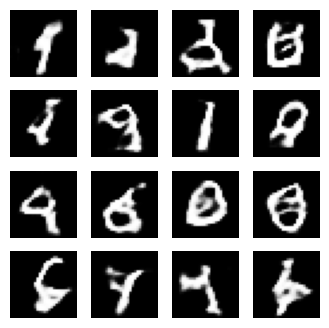

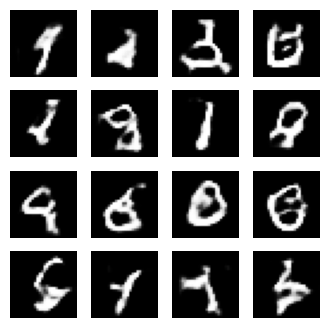

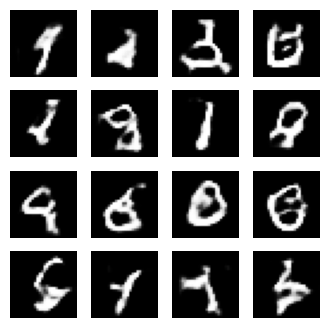

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np

def make_generator():
    return Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])

def make_discriminator():
    return Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])

generator = make_generator()
discriminator = make_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images, batch_size=32):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_opt.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    disc_opt.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

batch_size = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Training loop
epochs = 50
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] + 1) / 2, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)

    generate_and_save_images(generator, epoch + 1, seed)

generate_and_save_images(generator, epochs, seed)


### ***`10`***

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_model(use_batch_norm=False):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu' if not use_batch_norm else None),
        (BatchNormalization() if use_batch_norm else Dropout(0.2)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    return model.evaluate(x_test, y_test, verbose=0)

print("Dropout Model Accuracy:", train_model(use_batch_norm=False)[1])
print("Batch Norm Model Accuracy:", train_model(use_batch_norm=True)[1])


Dropout Model Accuracy: 0.9779999852180481
Batch Norm Model Accuracy: 0.9190999865531921


### ***`11`***

In [ ]:
!pip install tf-models-official
!pip install tensorflow


In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy==1.19.5  # Install a specific version (replace 1.19.5 with a compatible version)

In [ ]:
# Clone the Mask R-CNN repository if not already present
!git clone https://github.com/akTwelve/Mask_RCNN.git

import os
import sys
import skimage.io
import matplotlib.pyplot as plt
import tensorflow as tf

# Set up paths and configurations
ROOT_DIR = "Mask_RCNN"
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
IMAGE_PATH = "/content/abcd.png"
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Import Mask R-CNN and COCO configuration
sys.path.append(ROOT_DIR)
from mrcnn import utils, model as modellib, visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

# Download COCO weights if not already present
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Inference configuration for CPU
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 0
    IMAGES_PER_GPU = 1

config = InferenceConfig()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)

# Load image
image = skimage.io.imread(IMAGE_PATH)

# Perform detection
results = model.detect([image], verbose=0)
r = results[0]

# Class names for COCO dataset
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
               'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
               'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
               'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
               'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
               'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
               'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
               'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
               'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
               'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Visualize results
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])



### ***`12`***

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load a small sample text corpus (replace with your own)
corpus = [
    "Hello, how are you?",
    "I am doing well.",
    "What's your name?",
    "My name is ChatBot.",
    "How can I help you?",
    "Tell me a joke.",
    "Why did the chicken cross the road?",
    "To get to the other side."
]

# Tokenization and Vocabulary Creation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
word_index = tokenizer.word_index

# Set model parameters
embedding_dim = 128
lstm_units = 64
max_length = 10  # Adjust based on your corpus

# Prepare training data
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Split data into input and target sequences
input_sequences = padded_sequences[:, :-1]
target_sequences = padded_sequences[:, 1:]

# Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape target data to match output shape of the model
target_sequences = target_sequences.reshape((target_sequences.shape[0], target_sequences.shape[1], 1))

# Train the model (adjust epochs based on your data)
model.fit(input_sequences, target_sequences, epochs=200)

def generate_response(input_query, max_length=10):
    input_sequence = tokenizer.texts_to_sequences([input_query])[0]
    input_sequence = pad_sequences([input_sequence], maxlen=max_length-1, padding='pre')

    predicted_sequence = model.predict(input_sequence)
    predicted_words = [np.argmax(predicted_sequence[0][i]) for i in range(predicted_sequence.shape[1])]
    response = tokenizer.sequences_to_texts([predicted_words])[0]
    return response

# Example interaction
user_query = "Hello, how are you?"
response = generate_response(user_query)
print(f"User: {user_query}")
print(f"ChatBot: {response}")


### ***`13`***

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

model = tf.keras.models.load_model('yolo.h5')
classes = ["person", "bicycle", "car", "..."]  # Add your COCO classes

image = cv2.imread('coco_image.jpg')
input_image = cv2.resize(image, (416, 416))
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, 0)

detections = model.predict(input_image)

# Assuming YOLOv3 output format (adjust if needed):
boxes = detections[:, :, :4]
scores = detections[:, :, 4]
class_ids = np.argmax(detections[:, :, 5:], axis=-1)

# Filtering and NMS (simplified)
for i in range(len(boxes)):
    if scores[i] > 0.5:  # Confidence threshold
        x, y, w, h = boxes[i]
        x, y, w, h = int(x), int(y), int(w), int(h)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = classes[class_ids[i]]
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imshow("Detections", image)
cv2.waitKey(0)

### ***`14`***

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Load IMDB dataset (using top 5000 most frequent words)
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to have the same length
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build GRU model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

### ***`15`***

In [ ]:

import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def summarize_text(text, max_length=50):
    input_text = "summarize: " + text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", add_special_tokens=True)
    output_ids = model.generate(input_ids=input_ids, max_length=max_length, num_beams=4, no_repeat_ngram_size=2)
    summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return summary

text = """
Without strong security rules, anyone who has the address of your database can read / write to it, leaving your data vulnerable to attackers stealing, modifying, or deleting data as well as creating costly operations.
"""

summary = summarize_text(text)
print(summary)